In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
data = pd.read_csv("Advertising.csv")
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [11]:
data.drop(['Unnamed: 0'], axis=1)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


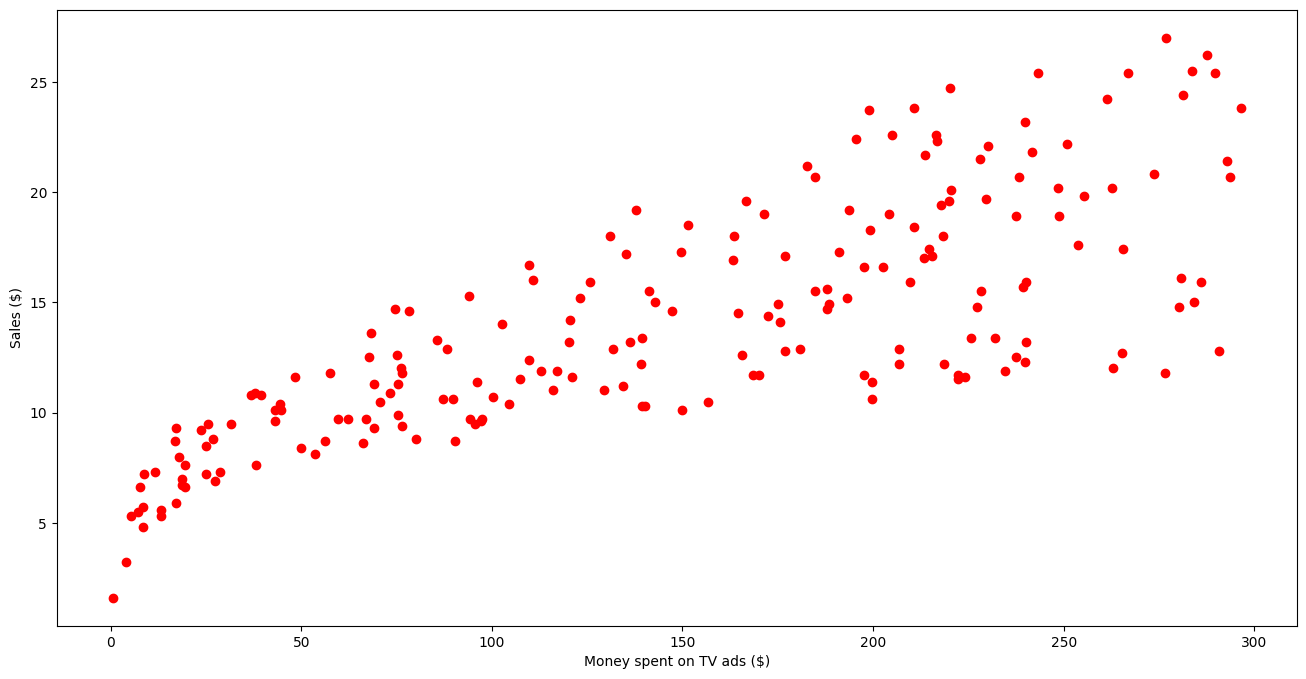

In [12]:
plt.figure(figsize=(16, 8))
plt.scatter(
 data['TV'],
 data['sales'],
 c='red'
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()


The linear model is: Y = 7.0326 +0.047537X


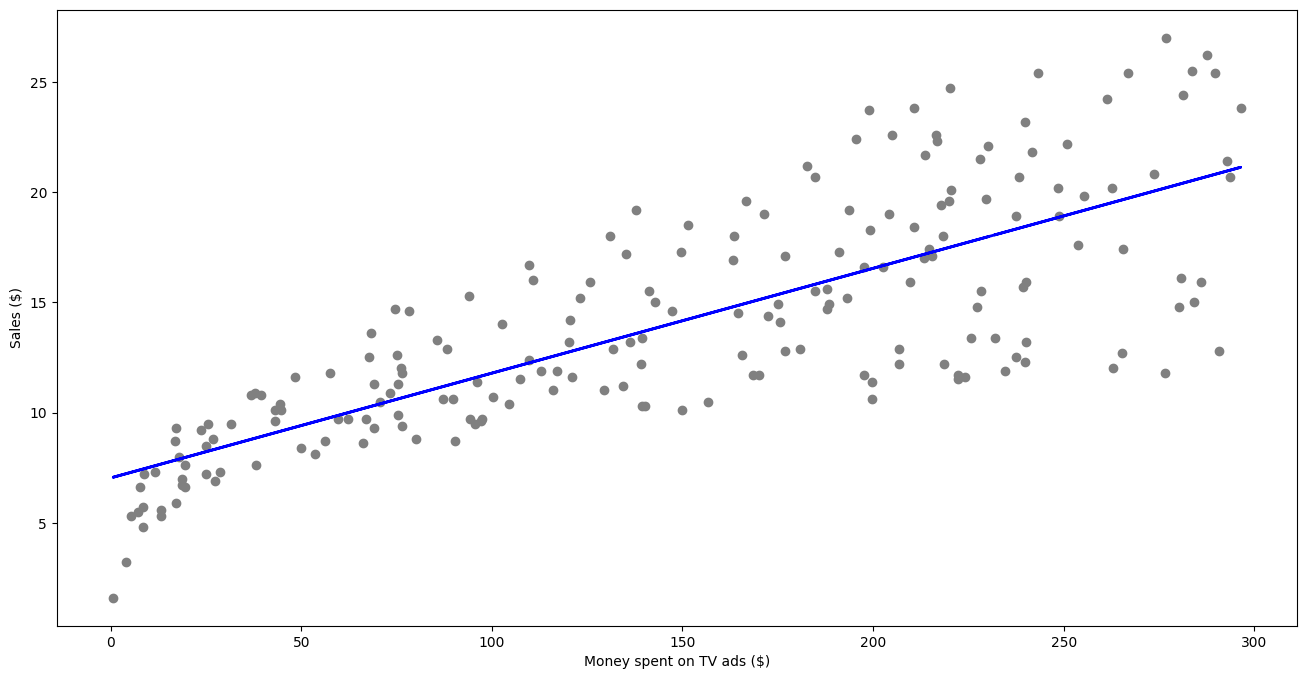

In [13]:
X = data['TV'].values.reshape(-1, 1)
y = data['sales'].values.reshape(-1, 1)
reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.5} +{:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

"The linear model is: Y = 7.0326 + 0.047537X"
# Visualise the Best Fit Line
predictions = reg.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(
 data['TV'],
 data['sales'],
 c='grey'
)
plt.plot(
 data['TV'],
 predictions,
 c='blue',
 linewidth=2
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

Regressional Model Training

In [14]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

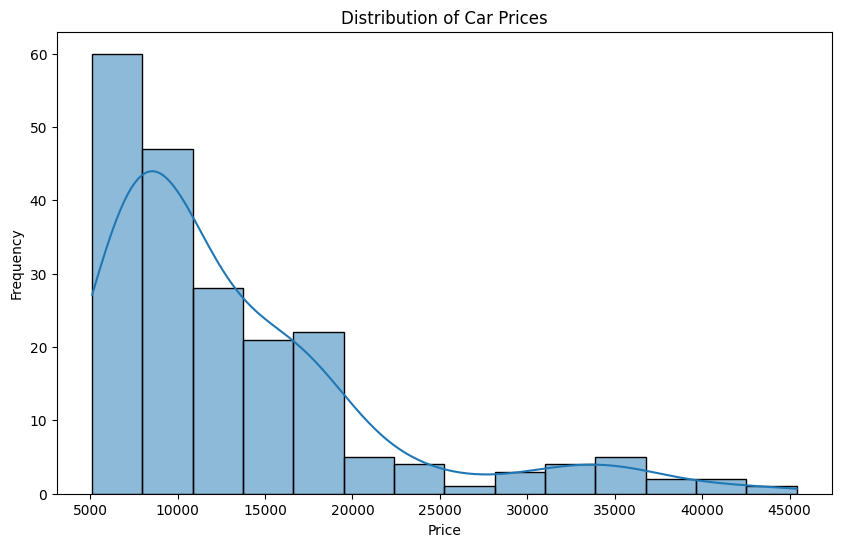

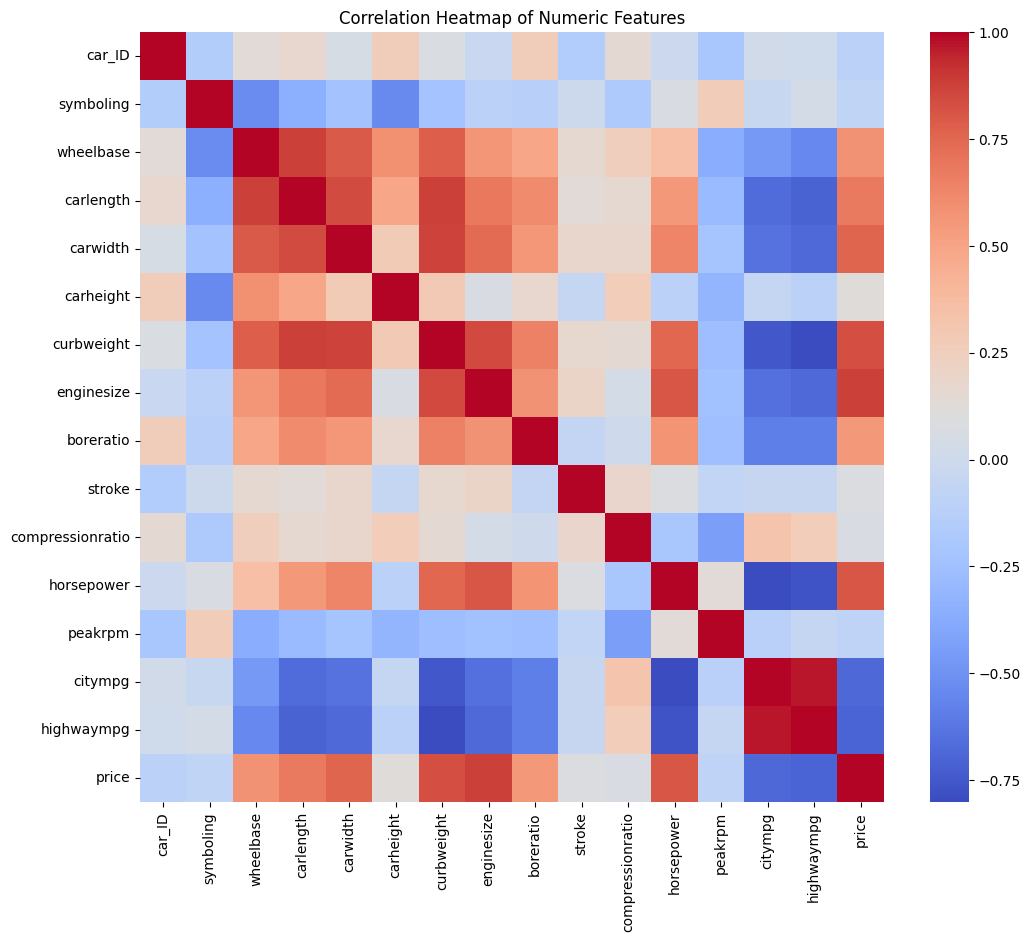

In [15]:
# Load the data
data = pd.read_csv("raw_data.csv")

# Data overview
print(data.info())
print("\nSample data:")
print(data.head())

# Visualize the distribution of the target variable (price)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap of numeric features
plt.figure(figsize=(12, 10))
numeric_data = data.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# Separate features and target
X = data.drop('price', axis=1)
y = data['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [16]:
# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Create a pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42))
])

Train RMSE: 1178.9016630648398
Test RMSE: 1895.8606076632911
Train R2 Score: 0.9766958496133668
Test R2 Score: 0.9544704284930133


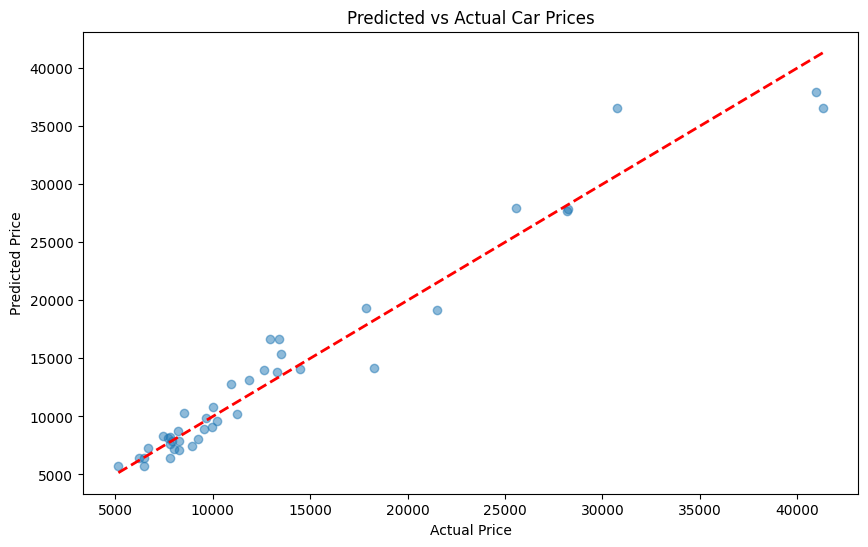

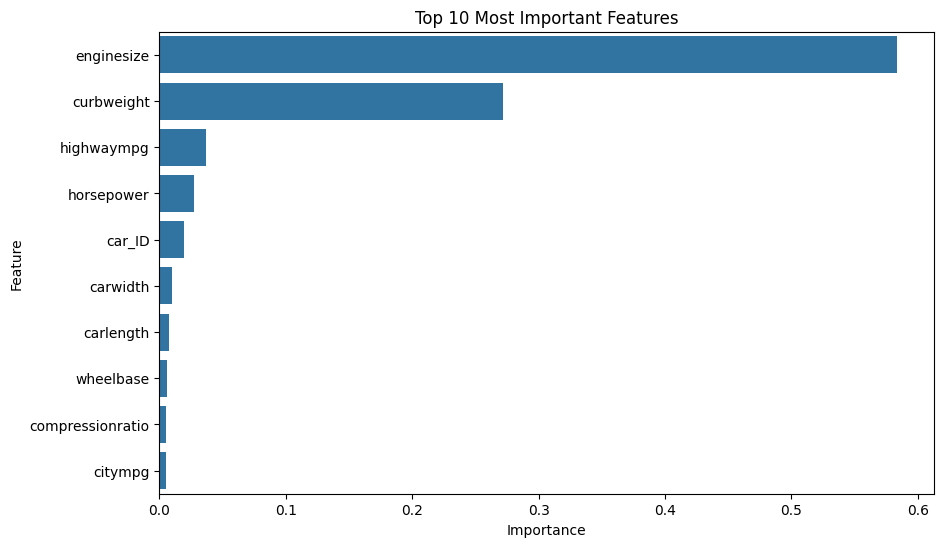

In [17]:

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Print results
print('Train RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('Train R2 Score:', r2_score(y_train, y_pred_train))
print('Test R2 Score:', r2_score(y_test, y_pred_test))

# Visualize predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Car Prices')
plt.show()

# Visualize feature importance
feature_importance = model.named_steps['regressor'].feature_importances_
feature_names = (model.named_steps['preprocessor']
                 .named_transformers_['num'].get_feature_names_out().tolist() +
                 model.named_steps['preprocessor']
                 .named_transformers_['cat'].get_feature_names_out().tolist())

feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [18]:
# Save the model
joblib.dump(model, 'car_price_model.joblib')

print("Model saved as 'car_price_predictor.joblib'")

Model saved as 'car_price_predictor.joblib'


In [19]:
# Function to make predictions
def predict_price(features):
    # Load the model
    loaded_model = joblib.load('car_price_model.joblib')
    
    # Make prediction
    prediction = loaded_model.predict(features)
    
    return prediction[0]

Predicted price: $13195.92


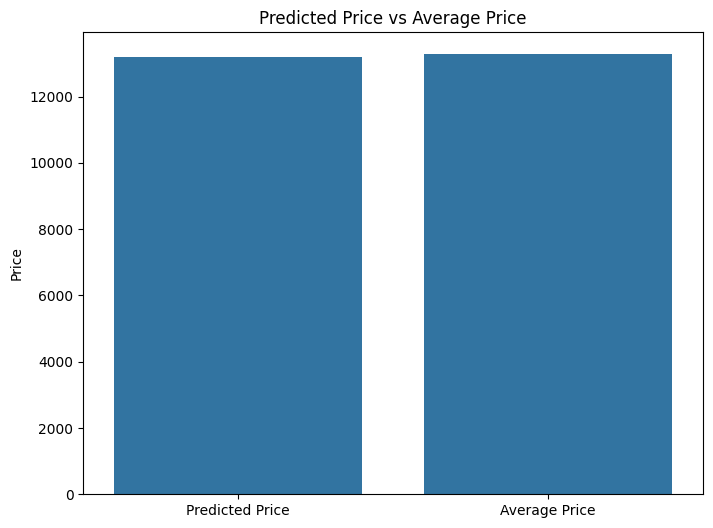

In [20]:

# Example usage
example_features = pd.DataFrame({
    'symboling': [3],
    'CarName': ['mazda rx-7 gs'],
    'fueltype': ['gas'],
    'aspiration': ['std'],
    'doornumber': ['four'],
    'carbody': ['sedan'],
    'drivewheel': ['fwd'],
    'enginelocation': ['front'],
    'wheelbase': [102.4],
    'carlength': [175.6],
    'carwidth': [66.5],
    'carheight': [54.9],
    'curbweight': [2414],
    'enginetype': ['ohc'],
    'cylindernumber': ['four'],
    'enginesize': [122],
    'fuelsystem': ['mpfi'],
    'boreratio': [3.31],
    'stroke': [3.54],
    'compressionratio': [8.7],
    'horsepower': [92],
    'peakrpm': [4200],
    'citympg': [27],
    'highwaympg': [32],
    'car_ID': [1]
}, index=[0])

predicted_price = predict_price(example_features)
print(f"Predicted price: ${predicted_price:.2f}")

# Visualize the prediction
plt.figure(figsize=(8, 6))
sns.barplot(x=['Predicted Price', 'Average Price'], 
            y=[predicted_price, data['price'].mean()])
plt.title('Predicted Price vs Average Price')
plt.ylabel('Price')
plt.show()